In [13]:
#conda install -c conda-forge/label/cf201901 pandas-profiling

In [14]:
import numpy as np  # Linear Algebra
import pandas as pd # data processing like reading of data
import matplotlib.pyplot as plt   # For plotting 
import seaborn as sns # For Plotting
import plotly.express  as px
#import pandas_profiling


import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
occupancy=pd.read_csv("datatraining.csv")
occupancy # viewing the first 2 rows of our dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.250000,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.000000,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.500000,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.250000,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8138,2/10/2015 9:29,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2/10/2015 9:29,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2/10/2015 9:30,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2/10/2015 9:32,21.10,36.2600,433.0,820.333333,0.005621,1


In [16]:
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [17]:
# The size of Data set
print('The size of the data is :', occupancy.size)

# Show dimension of the data
print("The Dimension is: {}".format(occupancy.shape))

The size of the data is : 57001
The Dimension is: (8143, 7)


In [18]:
occupancy.describe()
#occupancy.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


### Convert string date

In [19]:
occupancy['date'] = pd.to_datetime(occupancy['date'])
occupancy.reset_index(drop=True, inplace=True)

The date is in a string form, thus for us to be able to work with it, it should be converted into a dataframe datetime object

In [59]:
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day_period
0,2015-02-04 17:51:00,1.000000,0.470533,0.275490,0.190933,0.557318,1,1
1,2015-02-04 17:51:00,0.992823,0.470332,0.277754,0.186446,0.554807,1,1
2,2015-02-04 17:53:00,0.992823,0.469326,0.275490,0.186136,0.553761,1,1
3,2015-02-04 17:54:00,0.992823,0.467315,0.275490,0.182887,0.551669,1,1
4,2015-02-04 17:55:00,0.980861,0.467315,0.275490,0.180566,0.547851,1,1


### Normalize Data
Data columns have low and high values,which may cause inaccuracy as a feature column may dominate the prediction power. Thus they need to be normalised to bring all the feature columns to a common scale.

In [60]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(occupancy[columns]))
occupancy[columns] = scaler.transform(np.array(occupancy[columns]))

### Plotting BoxPlot
Now we plot a box plot to know how distributed the data is in each column relative to the target column, 'occupancy'.

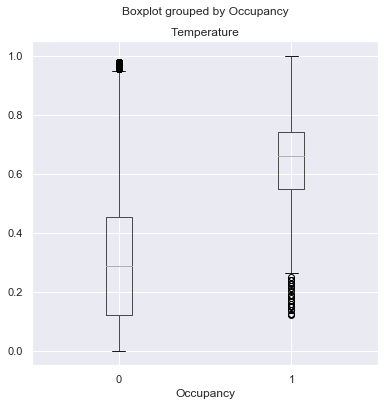

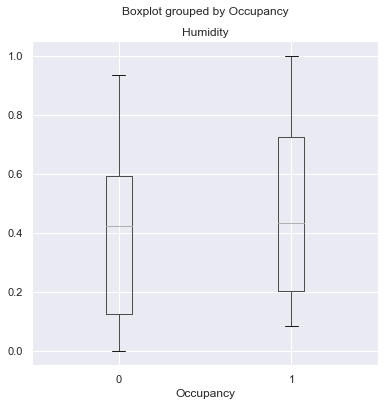

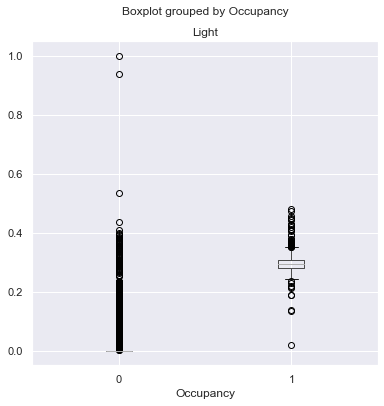

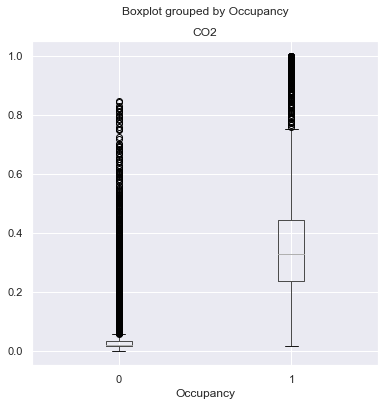

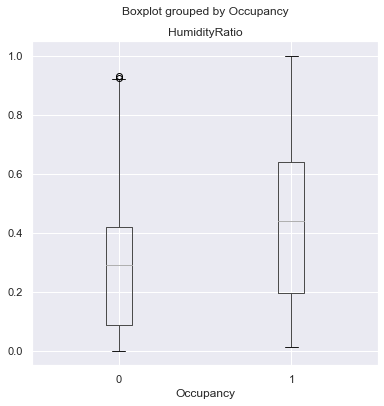

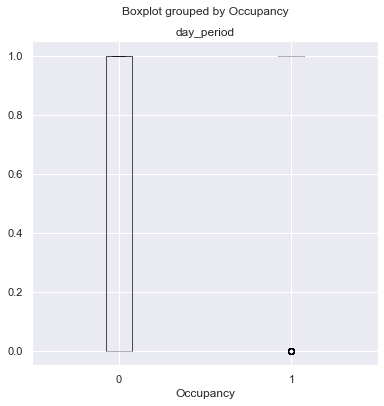

In [64]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','day_period']
for col in features:
    occupancy.boxplot(column=col, by='Occupancy', figsize=(6,6))
    plt.title(col)
    #plt.savefig('BoxPlot6')
plt.show()


Temperature, Light, CO2 and day_period have their data have a clear unbalanced distribution between room occupancy and no room occupancy. Thus, they may be predictive of the occupancy of a room.

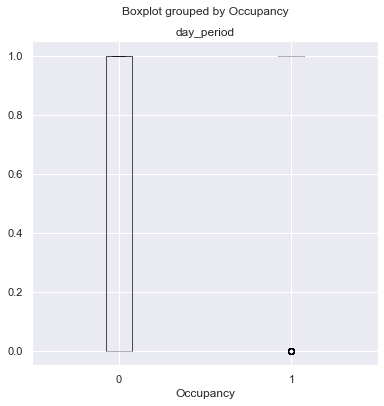

In [65]:
from matplotlib import pyplot as plt
%matplotlib inline

#features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','day_period']
#for col in features:
occupancy.boxplot(column='day_period', by='Occupancy', figsize=(6,6))
plt.title('day_period')
plt.savefig('BoxPlot6')
plt.show()

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean      0.387341     0.401676     0.077292     0.119942       0.312576   
std       0.243281     0.247233     0.125947     0.194536       0.224186   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.167464     0.154431     0.000000     0.016246       0.106304   
50%       0.332536     0.423623     0.000000     0.025220       0.296338   
75%       0.571770     0.616307     0.165795     0.139925       0.441308   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

        day_period  
count  8143.000000  
mean      0.425273  
std       0.494415  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


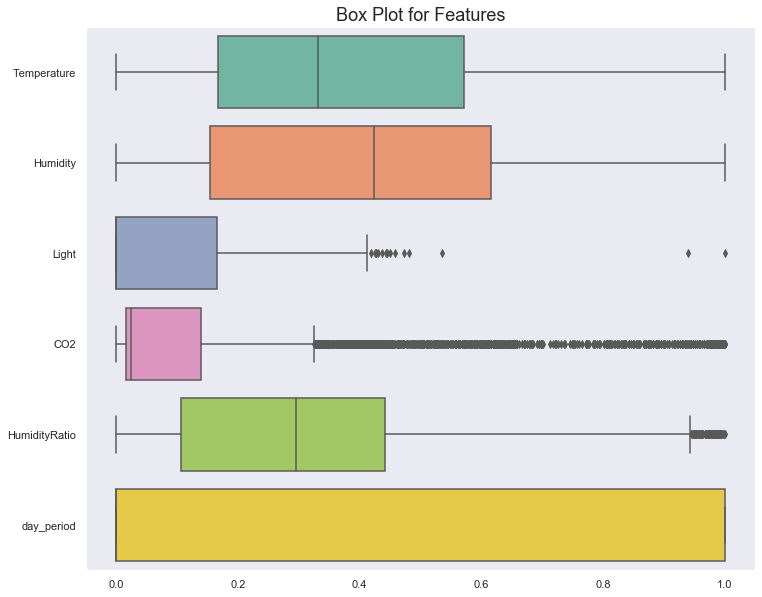

In [66]:
plt.figure(figsize=(12,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=occupancy.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(occupancy.drop(['date', 'Occupancy'],axis=1).describe())

### Correlation
Now that we have a fair idea about how the data in each column is distributed, let's find out how they correlate with the target column, Occupancy.

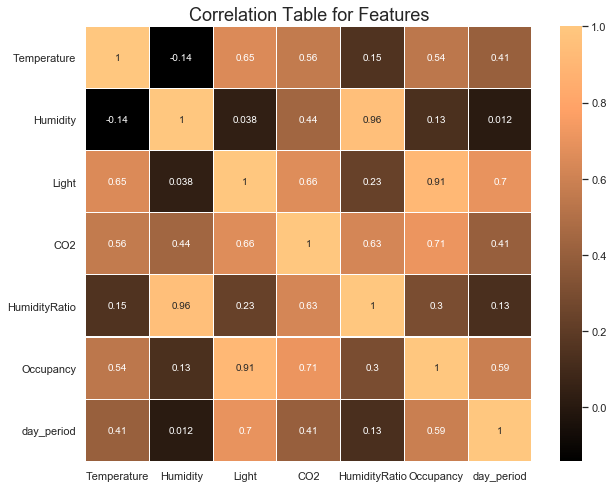

In [67]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(occupancy.corr(), annot=True, linewidths=.2, cmap='copper')
plt.savefig('Correlation Matrix')

It is observed that CO2 and light have a strong positive relation, Temperature has a moderate positive relation with occupancy. Thus they may be more predictive of whether a room is occupied or not.

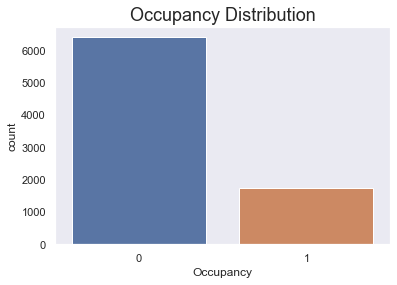

In [68]:
sns.set(style="dark")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=occupancy)
plt.savefig('Occupancy Distribution bar.png')

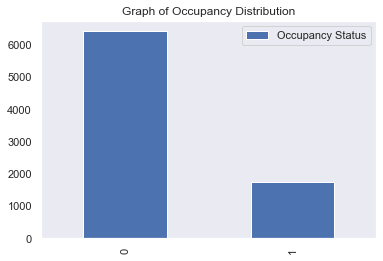

In [69]:
occupancy['Occupancy'].value_counts().plot(kind='bar',title='Graph of Occupancy Distribution' ,label="Occupancy Status")
plt.legend()
#plt.savefig('Paid Courses.png')

* The imbalance between room occupancy and no room occupancy can also be attributed to the time of the day.
* Below we extract the time of the days for which a room is occupied or not occupied into a list.

In [70]:
hours_1 = []
hours_0 = []
for date in occupancy[occupancy['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in occupancy[occupancy['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

min(hours_1)
max(hours_1)

18

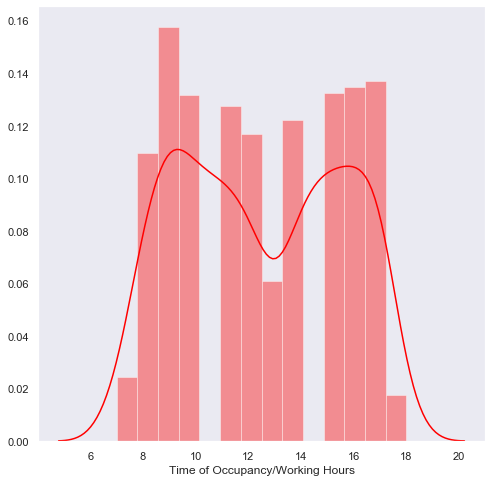

In [71]:
plt.figure(figsize=(8,8))
#ax = sns.distplot(hours_1)
sns.set(style='dark',)
ax = pd.Series(hours_1,name="Time of Occupancy/Working Hours")
plot = sns.distplot(ax, color='red')
#ax = sns.distplot(hours_0)
plt.savefig('Time of Occupancy density graph.png')

* We assume that the time for which the Occupancy column is 1 are working hours.
* However, there is no occupancy between 10 & 12(Probably a lunch break) and 14:00 and 16:00.
* We can then say the working hours are between 7am -18:00pm

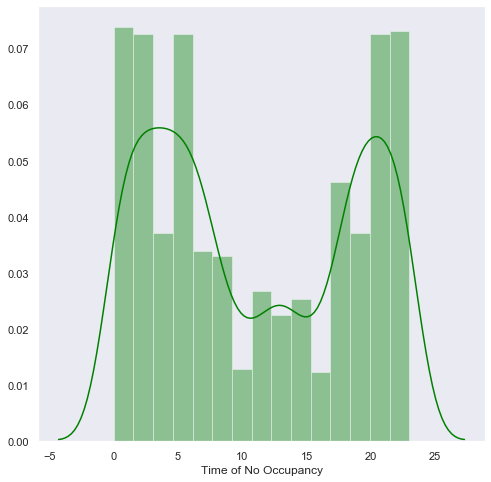

In [72]:
plt.figure(figsize=(8,8))
#ax = sns.distplot(hours_1)
sns.set(style='dark',)
ax = pd.Series(hours_0,name="Time of No Occupancy")
plot = sns.distplot(ax, color='green')
#ax = sns.distplot(hours_0)
plt.savefig('Time of No Occupancy density graph.png')

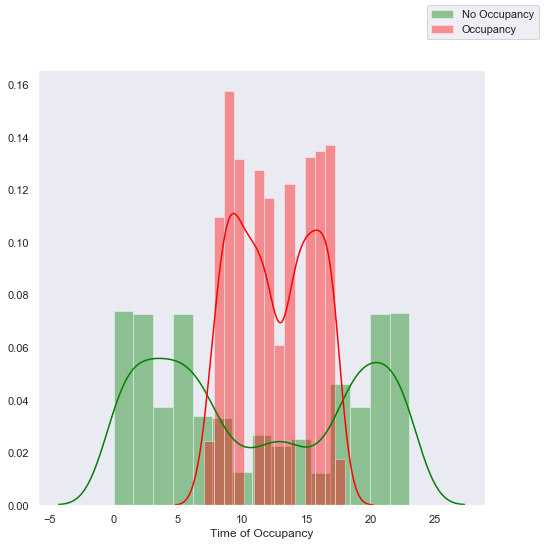

In [73]:
fig=plt.figure(figsize=(8,8))

sns.set(style='dark',)
ax = pd.Series(hours_0,name="Time of No Occupancy")
plot = sns.distplot(ax, color='green')

ax = pd.Series(hours_1,name="Time of Occupancy")
plot = sns.distplot(ax, color='red')

fig.legend(labels=['No Occupancy','Occupancy'])
#ax = sns.distplot(hours_1)
#ax = sns.distplot(hours_0)

plt.savefig('Time of No & Occupancy density graph.png')

From above histogram, what can you say? Between 07:00 and 18:00 there are occupants in the environment or not. But the time come to non-working hours, then we can absolutely say that there is no occupant. With this information, I will create a new feature from date column as day period.

* 07:00 - 18:00 working hour (labeled as 1)
* rest of the day non-working hour (labeled as 0)

We now insert a new column, 'day_period' as either working period(1) or non-working period(0).

In [74]:
occupancy['day_period'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in occupancy['date']]
occupancy.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day_period
1562,2015-02-05 19:53:00,0.514354,0.120684,0.000000,0.054000,0.088682,0,0
13,2015-02-04 18:04:00,0.968900,0.465080,0.270964,0.170045,0.541732,1,0
123,2015-02-04 19:53:00,0.691388,0.462845,0.000000,0.083398,0.454221,0,0
24,2015-02-04 18:15:00,0.930622,0.480724,0.000000,0.171283,0.545655,0,0
1215,2015-02-05 14:06:00,0.787081,0.408761,0.296831,0.237815,0.429662,0,1
2067,2015-02-06 04:18:00,0.332536,0.087384,0.000000,0.014080,0.023221,0,0
3106,2015-02-06 21:36:00,0.287081,0.095877,0.000000,0.019341,0.022030,0,0
7869,2015-02-10 04:59:00,0.271132,0.726562,0.000000,0.020991,0.562808,0,0
7926,2015-02-10 05:57:00,0.263158,0.730584,0.000000,0.022435,0.563651,0,0
7659,2015-02-10 01:30:00,0.308612,0.726562,0.000000,0.036051,0.575232,0,0


In [75]:
# Separate features and labels
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','day_period']
label = 'Occupancy'
X, y = occupancy[features].values, occupancy[label].values

for n in range(0,4):
    print("Status", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Status 1 
  Features: [1.0, 0.4705330204492122, 0.275490407474777, 0.190933003249265, 0.5573183940812534, 1.0] 
  Label: 1
Status 2 
  Features: [0.9928229665071768, 0.47033188065705667, 0.2777538263155322, 0.18644592294600026, 0.5548072719697539, 1.0] 
  Label: 1
Status 3 
  Features: [0.9928229665071768, 0.46932618169627904, 0.275490407474777, 0.186136469131982, 0.553761212198367, 1.0] 
  Label: 1
Status 4 
  Features: [0.9928229665071768, 0.4673147837747236, 0.275490407474777, 0.1828872040847903, 0.5516688296282424, 1.0] 
  Label: 1


### Split the data

In [76]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.size, X_test.size))

Training cases: 34200
Test cases: 14658


### Train and Evaluate a Binary Classification Model

In [77]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [78]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [1 1 0 ... 1 0 1]
Actual labels:     [1 1 0 ... 1 0 1]


In [79]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1915
           1       0.95      0.98      0.96       528

    accuracy                           0.98      2443
   macro avg       0.97      0.98      0.98      2443
weighted avg       0.98      0.98      0.98      2443



In [80]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.9487179487179487
Overall Recall: 0.9810606060606061


In [81]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[1887   28]
 [  10  518]]


In [82]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[5.40516021e-02 9.45948398e-01]
 [1.48133628e-01 8.51866372e-01]
 [9.99478141e-01 5.21858617e-04]
 ...
 [3.77970048e-02 9.62202995e-01]
 [9.99940137e-01 5.98633053e-05]
 [1.43955632e-01 8.56044368e-01]]


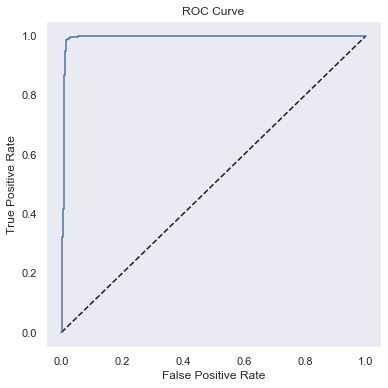

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9932737953952053


### Classification Using Support Vector Machine

In [85]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Accuracy for SVM on validation data: {}%".format(round((svm_model.score(X_test, y_test)*100),2)))

Accuracy for SVM on validation data: 98.85%


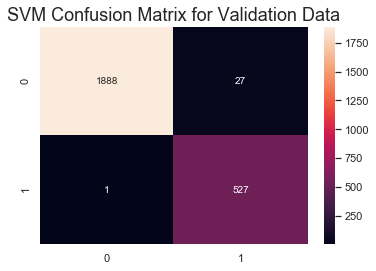

In [86]:
y_pred = svm_model.predict(X_test)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")